In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("metrics.csv")
df.sample(5)

,run_name,arc_features,arc_skip,arc_num_conv,arc_latent_volume,arc_encoder_blocks,n_swaps,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
598,nc-1-n4-0-n8-0-skip0-6,[4],0,1,512.0,0,6,NaN,NaN,0.057707,NaN,NaN,0.893389,NaN,NaN,0.898085,NaN,NaN,0.000000
380,nc-1-n4-0-n8-1-skip1-12,"[4, 8]",1,1,512.0,1,12,NaN,NaN,0.034012,NaN,NaN,0.992900,NaN,NaN,0.992929,NaN,NaN,0.022518
462,nc-2-n4-1-n8-0-skip0-6,"[4, 4]",0,2,256.0,1,6,NaN,NaN,0.137059,NaN,NaN,0.711629,NaN,NaN,0.773939,NaN,NaN,0.000000
277,nc-1-n4-1-n8-2-skip1-10,"[4, 4, 8, 8]",1,1,128.0,3,10,NaN,NaN,0.083708,NaN,NaN,0.920260,NaN,NaN,0.924844,NaN,NaN,0.000000
371,nc-1-n4-0-n8-2-skip0-28,"[4, 8, 8]",0,1,256.0,2,28,NaN,NaN,0.145872,NaN,NaN,0.707318,NaN,NaN,0.762235,NaN,NaN,0.000000


In [37]:
df[['arc_features',	'arc_skip',	'arc_num_conv',	'arc_latent_volume',	'arc_encoder_blocks']].value_counts()

arc_features     arc_skip  arc_num_conv  arc_latent_volume  arc_encoder_blocks
[4, 4, 4, 8, 8]  0         1             64.0               4                     17
                           2             64.0               4                     17
                 1         1             64.0               4                     17
                           2             64.0               4                     17
[4, 4, 4, 8]     0         1             128.0              3                     17
                           2             128.0              3                     17
                 1         1             128.0              3                     17
                           2             128.0              3                     17
[4, 4, 4]        0         1             128.0              2                     17
                           2             128.0              2                     17
                 1         1             128.0              2          

In [38]:
import plotly.express as px
import pandas as pd 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hue = "arc_features"
yplot = "test_Accuracy"
xplot = "n_swaps"
extra_info = ["arc_num_conv", "arc_encoder_blocks", "arc_latent_volume"]


df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico
fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(width=900, height=500, legend_title="canales", showlegend=True,
                  xaxis={'title':{'text':"# Swaps"}},
                  yaxis={'title':{'text':"Test Accuracy"}},
                  )

fig.show()

In [39]:
import plotly.express as px
import pandas as pd

hue = "n_swaps"
yplot = "test_Accuracy"
xplot = "arc_features"

extra_info = ["arc_features", "arc_num_conv",  "arc_latent_volume", "arc_encoder_blocks"]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info)

fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

# Combinar ambos gráficos en subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num swaps", showlegend=True,
                  xaxis={'title':{'text':"Canales"}},
                  yaxis={'title':{'text':"Test Accuracy"}},)

fig.show()

In [43]:
import plotly.express as px
import pandas as pd

hue = "n_swaps"
yplot = "test_Accuracy"
xplot = "arc_latent_volume"

extra_info = ["arc_features", "arc_num_conv",  "arc_features", "arc_encoder_blocks"]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info)

fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

# Combinar ambos gráficos en subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num swaps", showlegend=True,
                  xaxis={'title':{'text':"Canales"}},
                  yaxis={'title':{'text':"Test Accuracy"}},)

fig.show()

In [40]:
import plotly.express as px
import pandas as pd

hue = "arc_latent_volume"
yplot = "test_Accuracy"
xplot = "n_swaps"

# extra_info = ["test_file", "arc_features", "train_Accuracy", "valid_Accuracy"]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip" 
)
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip")

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

# Combinar ambos gráficos en subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"])

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num Params", showlegend=True)

fig.show()

In [41]:
df.columns

Index(['run_name', 'arc_features', 'arc_skip', 'arc_num_conv',
       'arc_latent_volume', 'arc_encoder_blocks', 'n_swaps', 'train_loss',
       'valid_loss', 'test_loss', 'valid_F1', 'train_F1', 'test_F1',
       'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')

NameError: name 'a' is not defined

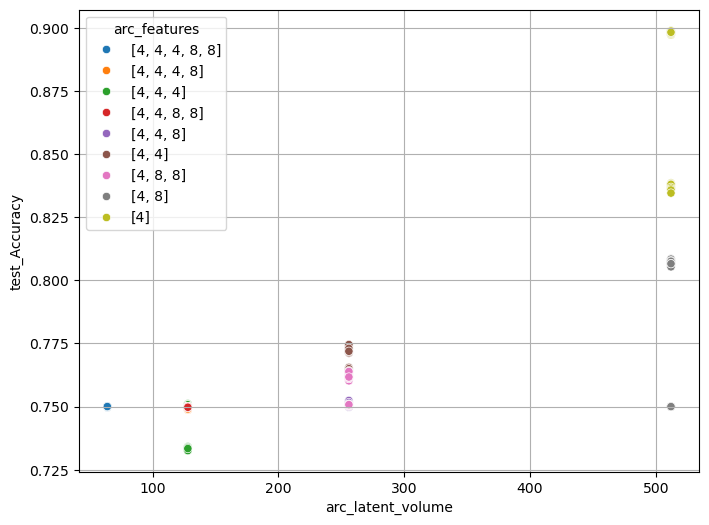

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

hue = "arc_features"
xplot = "arc_latent_volume"
yplot = "test_Accuracy"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=df0.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax)

ax.grid()
ax.set_xlabel(a.get_xlabel(), fontsize=14)
ax.set_ylabel(a.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)

fig.suptitle("Test Accuracy vs Latent Volume", fontsize=14)
ax.set_title("No skip", fontsize=14)
ax.legend(
    title="Features",
    bbox_to_anchor=(1.01, 1),
)
fig.tight_layout()
plt.show()

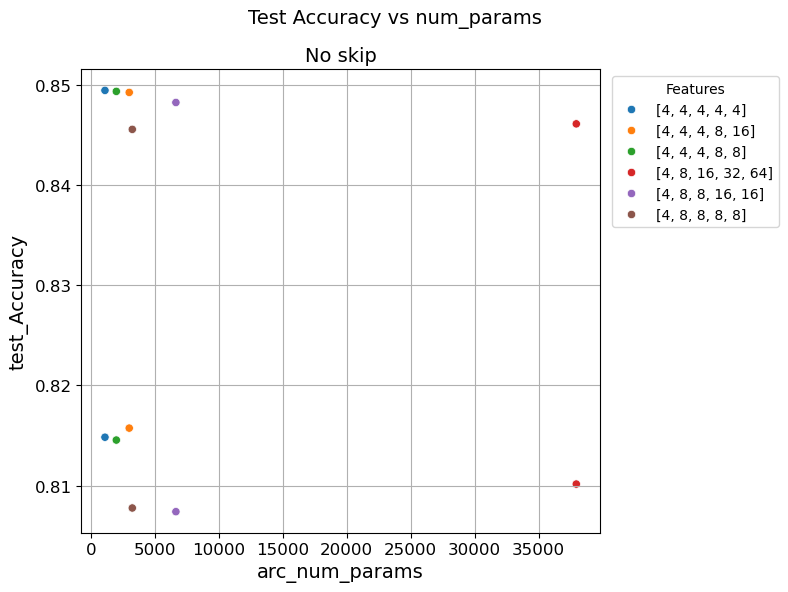

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

hue = "arc_features"
xplot = "arc_num_params"
yplot = "test_Accuracy"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=df0.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax)

ax.grid()
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)

fig.suptitle("Test Accuracy vs num_params", fontsize=14)
ax.set_title("No skip", fontsize=14)
ax.legend(
    title="Features",
    bbox_to_anchor=(1.01, 1),
)
fig.tight_layout()
plt.show()